# Open Classrooms - Project 4

## Cleaning Notebook - Pierre Schifflers

# Objectives
Based on 2015 and 2016 data:
- Predict CO2 Emissions of buildings in Seattle
- Predict total energy consumption of buildings in Seattle
- Evaluate benefit of using Energy Star Score in predictions

Data source: https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking <br>
Assignment page: https://openclassrooms.com/fr/projects/629/assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [2]:
#Set up environment
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = [14, 6]

In [3]:
#Open 2015 file
df_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [4]:
#Open 2016 file
df_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

## Joining Datasets

The first thing to do here is to combine both datasets into a single dataset. We will do this by unioning them where the primary key will be a combination of OSE Building ID + Data Year

In [5]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [6]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [7]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


We notice that there are a few differences in the setup of the files:<br>
- 2015 has a few redundant columns that aren't in the 2016 file.<br>
- 2016 has separate columns for geographical info whereas in the 2015 file, they are packed in an embedded dictionary

In [8]:
#Return columns that are in the 2016 file but not in 2015
np.setdiff1d(df_2015.columns,df_2016.columns,assume_unique=True).tolist()

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

Some of these columns are not in the 2016 file while some of them seem to just have different names

In [9]:
#Drop columns not included in 2016 file
df_2015.drop(columns = ['2010 Census Tracts', 
                        'Seattle Police Department Micro Community Policing Plan Areas', 
                        'City Council Districts', 
                        'SPD Beats', 
                        'Zip Codes',
                        'OtherFuelUse(kBtu)'
                       ], inplace = True)

Some of the columns have similar names and by checking the metadata files, we can confirm that they do indeed contain the same information as they have the same description:
- GHGEmissions(MetricTonsCO2e) in 2015 vs TotalGHGEmissions in 2016: 
    - "The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent."

- GHGEmissionsIntensity(kgCO2e/ft2) in 2015 vs GHGEmissionsIntensity in 2016
    - "Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources"

In [10]:
#Rename columns with different names
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions", 
                        "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity",
                        "Comment": "Comments"
                       }, inplace = True)

In [11]:
#Percent of values in 2015 dataset that are found in 2016 dataset
round((1 - (len(np.setdiff1d(df_2016['OSEBuildingID'],df_2015['OSEBuildingID'],assume_unique=True).tolist())/len(df_2015)))*100,2)

97.25

In [12]:
#Percent of values in 2016 dataset that are found in 2015 dataset
round((1 - (len(np.setdiff1d(df_2015['OSEBuildingID'],df_2016['OSEBuildingID'],assume_unique=True).tolist())/len(df_2015)))*100,2)

98.32

<b>Conclusion:</b> The large majority of the dataset overlaps between 2015 and 2016

In [13]:
#Unpacking the embedded dictionary in the location column

#First, we make a separate dataframe for this data
df_loc = df_2015['Location']

In [14]:
#Split the columns based on , and :
df_loc = df_loc.str.split(',|:|}',expand=True)

#Drop the columns with no info
df_loc.drop(columns = [0, 2, 4, 5, 7, 9, 11,13,14], inplace = True)

In [15]:
#Rename the columns following the format in the 2016 file
df_loc.columns = ['Latitude', 'Longitude', 'Address', 'City', 'State', 'ZipCode']

In [16]:
#Remove the leading and trailing quotation marks in the data
for i in df_loc.columns:
    df_loc[i] = df_loc[i].str[2:-1]

In [17]:
#Convert the data type to the same format as in the 2016 data
df_loc['Latitude'] = df_loc['Latitude'].astype(float)
df_loc['Longitude'] = df_loc['Longitude'].astype(float)
df_loc['ZipCode'] = df_loc['ZipCode'].astype(float)

In [18]:
#Attach the new columns to the 2015 file
df_2015_merge = pd.merge(df_2015, df_loc, left_on = df_2015.index, right_on = df_loc.index)

#Drop newly created key column and packed location column
df_2015_merge.drop(columns= ['key_0', 'Location'], inplace = True)

In [19]:
#Create combined dataset entitled data
data = pd.concat([df_2015_merge, df_2016], join = 'inner')

#Reset index
data.reset_index(drop = True, inplace = True)

In [20]:
#Create Primary key column
data['Key'] = data['OSEBuildingID'].astype(str)+'_'+data['DataYear'].astype(str)

In [21]:
#Merged dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

## Identifying Target Variables

The task instructions are to predict:
- CO2 Emissions
- Total Energy Consumption
for buildings for which this data has not yet been measured

Based on this, the two best variables to use seem to be:
- <b>Site Energy Use WN (kBtu)</b> --> The annual amount of energy consumed by the property from all sources of energy.<br>
<i>Note</i>: There is a Weather-Normalized version of this variable, however, I will explain below why I prefer to use the non-normalized version of the variable.
- <b>Total GHG Emissions</b> --> The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

Column description source: https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [22]:
tar_var = ['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']

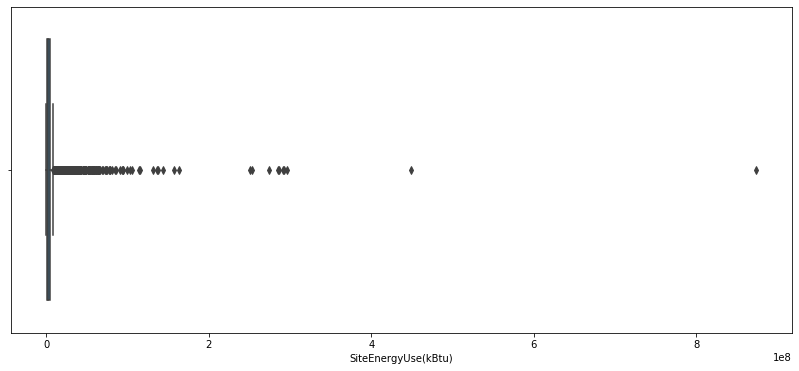

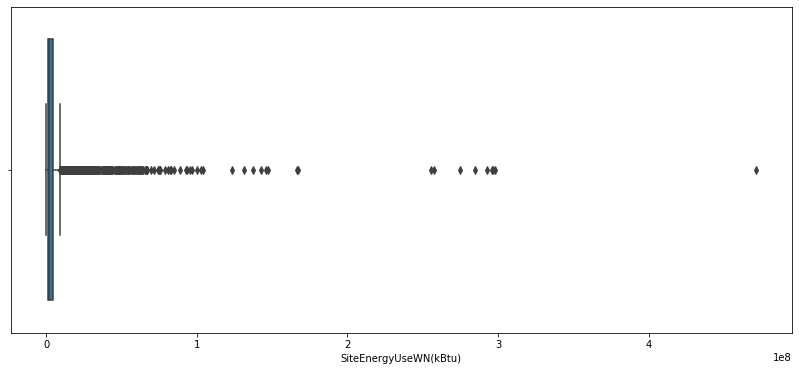

In [23]:
for i in tar_var:
    sns.boxplot(data[i], showfliers = True)
    plt.show()

The distribtutions between the two variables are very similar except that the weather-normalized version has less spread on the outliers.

In [24]:
for i in tar_var:
    print(i)
    print(data[i].describe())
    print('\n')

SiteEnergyUse(kBtu)
count    6.701000e+03
mean     5.194673e+06
std      1.813648e+07
min      0.000000e+00
25%      9.200689e+05
50%      1.791071e+06
75%      4.135280e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64


SiteEnergyUseWN(kBtu)
count    6.700000e+03
mean     5.240110e+06
std      1.500896e+07
min      0.000000e+00
25%      9.818029e+05
50%      1.926136e+06
75%      4.377974e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64




Generally, the two metrics are very similar to one another with a slightly smaller standard deviation on the weather-normalized version and a lower maximum value

In [25]:
for i in tar_var:
    print(f"{i} has {len(data[data[i] == 0])} values with value 0")

SiteEnergyUse(kBtu) has 20 values with value 0
SiteEnergyUseWN(kBtu) has 41 values with value 0


We do see, however, that the weather-normalized version has more values at 0 than the regular version, indicating that certain values are missing from the weather-normalized variable. Given the similarity between the two variables, I prefer to keep the regular version which contains more measurements.

## Data Cleaning

#### Data cleaning checks to perform:<br>
-OSEBuildingID: Check that there are no duplicates<br>
-BuildingType: Check for lexical errors<br>
-PrimaryPropertyType: Check for lexical errors<br>
-CouncilDistrictCode: Check formatting<br>
-Neighborhood: Check for lexical errors<br>
-YearBuilt: Check for outliers or unrealistic values<br>
-NumberofBuildings: Check for outliers or unrealistic values<br>
-NumberofFloors: Check for outliers or unrealistic values<br>
-PropertyGFATotal: Check for outliers or unrealistic values<br>
-PropertyGFAParking: Check that this is not higher than GFATotal<br>
-PropertyGFABuilding(s): Check that this + parking = GFATotal<br>
-LargestPropertyUseType: Check for lexical errors<br>
-LargestPropertyUseTypeGFA: Check that not larger than GFATotal<br>
-SecondLargestPropertyUseType: Check for lexical errors<br>
-SecondLargestPropertyUseTypeGFA: Check that not larger than GFATotal<br>
-ThirdLargestPropertyUseType: Check for lexical errors<br>
-ThirdLargestPropertyUseTypeGFA: Check that not larger than GFATotal<br>
-ENERGYSTARScore: Check that values are all between 1 and 100<br>
-SiteEUI to GHGE: Check for outliers<br>
-Seattle Police Department Micro Community Policing Plan Areas: Check value counts<br>
-Zip Codes: Check value counts

## Missing Data

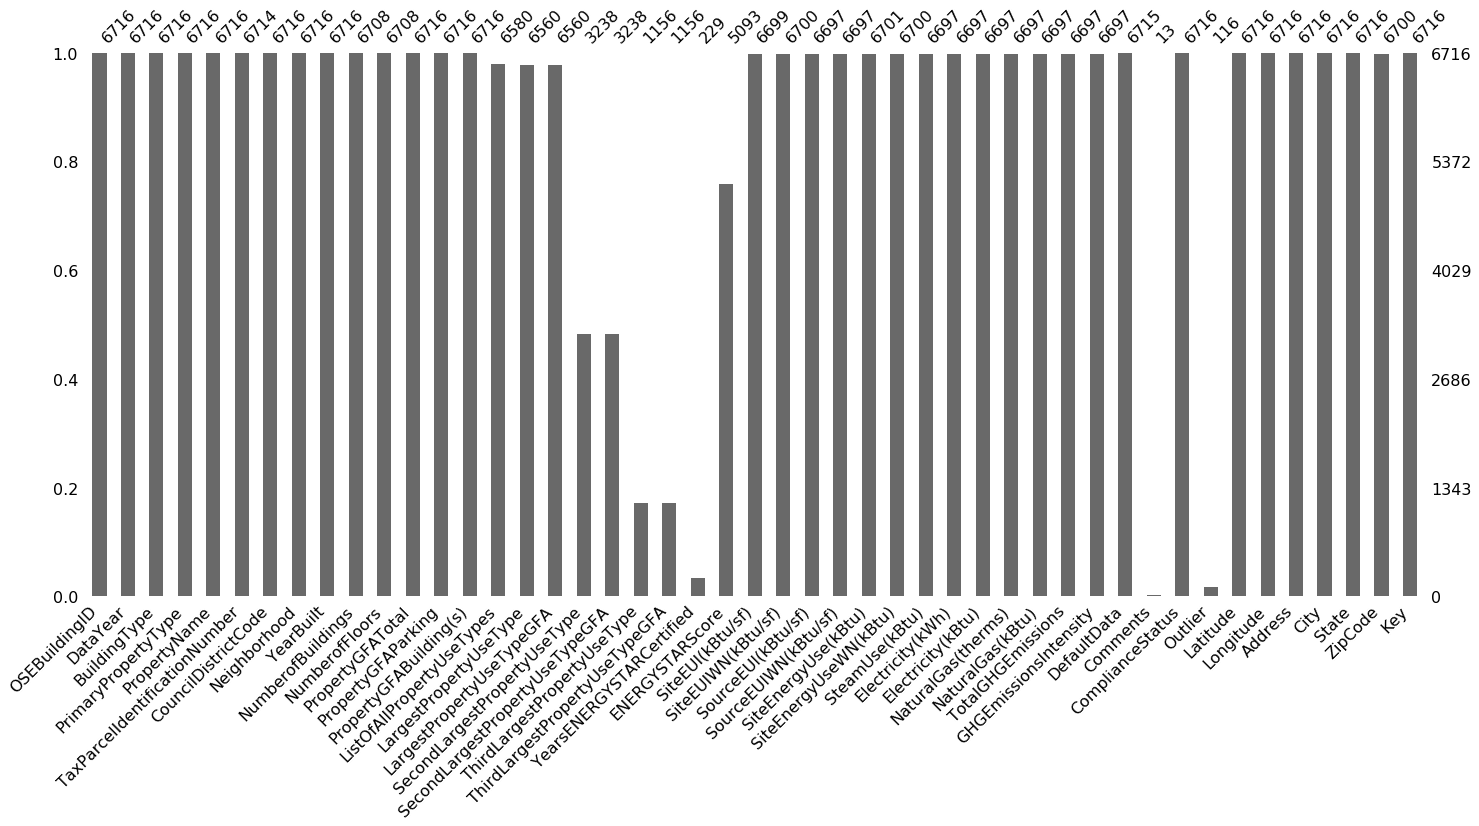

In [26]:
#Visualise missing data
msno.bar(data)

In [27]:
#From the above graph, we see that we have 10 missing rows for our target values (Energy Use and CO2 emissions), we can drop these.
data.dropna(subset = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], inplace = True)

For the rest, the useful columns seem to be well filled out and columns with missing values aren't necessarily problematic (for example, Third Largest Property Use Type) where there might not be a third type.

### Categorical Variables

In [28]:
#For categorical variables, we can replace null values by a string NA

#Find categorical variables and replace value by NA
str_cols = data.columns[data.dtypes==object]
data[str_cols] = data[str_cols].fillna('NA')

### Numerical Variables

#### Number of Floors

In [29]:
#For numerical variables, we need to handle them case by case to ensure we don't fill in unreasonable values

#For Number of Floors, most reasonable approach would be to check if we have the data in the other year
data[data['NumberofFloors'].isnull()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
2015,24086,2015,Campus,Other,KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BAS...,7666203387,2,GREATER DUWAMISH,1991,10.0,NaN,180796,0,180796,"Other, Parking",Other,230970.0,Parking,0.0,NA,NaN,NA,NaN,129.6,146.7,287.4,305.3,29939196.0,33884892.0,0.0,4900163.0,16720050.0,132198.0,13219839.0,818.66,4.13,No,NA,Compliant,NA,47.591130,-122.323398,1333 AIRPORT WAY S,SEATTLE,WA,98134.0,24086_2015
3171,40028,2015,NonResidential,Non-Refrigerated Warehouse,"SAND POINT BUILDING 5A,5B,5C,5D",225049077,4,NORTHEAST,1940,1.0,NaN,384772,0,384772,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,349953.0,Office,63872.0,NA,NaN,NA,65.0,37.2,40.4,84.2,87.5,15411831.0,16729664.0,0.0,2615758.0,8925337.0,64869.0,6486866.0,406.74,0.96,Yes,NA,Compliant,NA,47.683844,-122.261760,7561 63RD AVE NE,SEATTLE,WA,98115.0,40028_2015
3172,40031,2015,NonResidential,Medical Office,SAND POINT BUILDING 25,225049077,4,NORTHEAST,1960,1.0,NaN,30287,0,30287,Medical Office,Medical Office,31843.0,NA,NaN,NA,NaN,NA,56.0,62.1,65.5,174.9,178.5,1976647.0,2085495.0,0.0,489786.0,1671219.0,3055.0,305497.0,27.88,0.68,Yes,NA,Compliant,NA,47.682195,-122.262390,6222 NE 74TH ST,SEATTLE,WA,98115.0,40031_2015
3173,40034,2015,NonResidential,Medical Office,SAND POINT BUILDING 29,225049077,4,NORTHEAST,1960,1.0,NaN,21931,0,21931,Medical Office,Medical Office,28000.0,NA,NaN,NA,NaN,NA,21.0,133.3,157.9,238.0,263.8,3732139.0,4422217.0,0.0,384833.0,1313104.0,24191.0,2419089.0,137.63,6.02,Yes,NA,Compliant,NA,47.682195,-122.262946,6200 NE 74TH ST,SEATTLE,WA,98115.0,40034_2015
3193,43948,2015,Nonresidential COS,Other,GEORGETOWN STEAM PLANT,NA,2,GREATER DUWAMISH,1906,1.0,NaN,39212,0,39212,Other,Other,39212.0,NA,NaN,NA,NaN,NA,NaN,19.7,19.7,61.9,61.9,773013.0,773013.0,0.0,226557.0,773045.0,0.0,0.0,5.39,0.05,No,NA,Compliant,NA,47.561588,-122.316071,6605 13TH AVE S,SEATTLE,WA,98108.0,43948_2015
3209,49705,2015,Nonresidential COS,Other,MAGNUSON PARK CAMPUS,225049062,4,NORTHEAST,1929,7.0,NaN,502030,0,502030,Other - Recreation,Other - Recreation,564258.0,NA,NaN,NA,NaN,NA,NaN,30.6,36.6,68.0,76.3,17290816.0,20657716.0,0.0,2831519.0,9661544.0,76297.0,7629673.0,472.56,0.86,No,NA,Compliant,NA,47.683179,-122.258795,7400 SAND POINT WAY NE,SEATTLE,WA,98115.0,49705_2015
3311,49958,2015,Nonresidential COS,Other,FIRST HILL STREET CAR MAINTENANCE,8592900285,2,GREATER DUWAMISH,2014,1.0,NaN,20993,0,20993,"Repair Services (Vehicle, Shoe, Locksmith, etc)","Repair Services (Vehicle, Shoe, Locksmith, etc)",20983.0,NA,NaN,NA,NaN,NA,NaN,43.5,47.6,123.8,131.1,912558.0,998308.0,0.0,229871.0,784351.0,1282.0,128239.0,12.28,0.42,No,NA,Compliant,NA,47.595246,-122.322947,848 7TH AVE S,SEATTLE,WA,98134.0,49958_2015
3313,49966,2015,NonResidential,Other,SMILOW RAINIER VISTA BOYS & GIRLS CLUB,6056110050,2,SOUTHEAST,2009,1.0,NaN,40265,0,40265,Pre-school/Daycare,Pre-school/Daycare,40265.0,NA,NaN,NA,NaN,NA,NaN,48.6,54.1,120.3,127.2,1957356.0,2176523.0,0.0,391024.0,1334228.0,6232.0,623184.0,42.40,0.91,No,NA,Compliant,NA,47.541027,-122.312492,4520 M L KING JR WAY S,SEATTLE,WA,98108.0,49966_2015


In [30]:
#All these values are in 2015 so let's replace them with the 2016 values where possible

for i in data[data['NumberofFloors'].isnull()]['OSEBuildingID'].index:
    build_id = data.loc[i, 'OSEBuildingID']
    correct_val = data[(data['OSEBuildingID'] == build_id) & (data['DataYear'] == 2016)]['NumberofFloors'].tolist()[0]
    data.loc[i, 'NumberofFloors'] = correct_val

#### Largest Property Use Type GFA

In [31]:
#We can assume that the Largest Property Use Type GFA is linked to the Total GFA

#First check whether there are any values for Secondary or Third largest use for null values in Primary

print(data[data['LargestPropertyUseTypeGFA'].isnull()]['SecondLargestPropertyUseTypeGFA'].value_counts())
print(data[data['LargestPropertyUseTypeGFA'].isnull()]['ThirdLargestPropertyUseTypeGFA'].value_counts())

Series([], Name: SecondLargestPropertyUseTypeGFA, dtype: int64)
Series([], Name: ThirdLargestPropertyUseTypeGFA, dtype: int64)


In [32]:
# With the above check being OK, we can replace missing values by the ratio of Total GFA to Largest Property Use Type GFA

#Find ratio
ratio = (
sum(data[~data['LargestPropertyUseTypeGFA'].isnull()]['LargestPropertyUseTypeGFA']) 
/ 
sum(data[~data['LargestPropertyUseTypeGFA'].isnull()]['PropertyGFATotal'])
)

#Replace null values by Total GFA * ratio
for i in data[data['LargestPropertyUseTypeGFA'].isnull()].index:
    data.loc[i, 'LargestPropertyUseTypeGFA'] = data.loc[i, 'PropertyGFATotal'] * ratio

In [33]:
#For the second and third, it is normal that the data might not be filled out as it is possible for a property not to have a second or third use, we can replace these by 0

#Second
for i in data[data['SecondLargestPropertyUseTypeGFA'].isnull()].index:
    data.loc[i, 'SecondLargestPropertyUseTypeGFA'] = 0

#Third
for i in data[data['ThirdLargestPropertyUseTypeGFA'].isnull()].index:
    data.loc[i, 'ThirdLargestPropertyUseTypeGFA'] = 0

#### Zip Codes

In [34]:
#Check if missing Zip Codes is an issue for a particular year

data[data['ZipCode'].isnull()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
6700,50196,2016,Nonresidential COS,Mixed Use Property,Northgate Community Center,2926049431,5,NORTH,2005,1.0,1.0,20616,0,20616,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,9900.0,Fitness Center/Health Club/Gym,8577.0,Pre-school/Daycare,1364.0,NA,NaN,30.900000,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05,0.0,186683.90630,6.369655e+05,0.000000,0.000000e+00,4.44,0.22,False,NA,Compliant,NA,47.70541,-122.32232,10510 5th Ave NE,Seattle,WA,NaN,50196_2016
6701,50198,2016,Nonresidential COS,Other,Fire Station 06 (New),1250200565,3,CENTRAL,2013,1.0,1.0,11685,0,11685,Prison/Incarceration,Prison/Incarceration,11685.0,NA,0.0,NA,0.0,NA,NaN,72.800003,82.900002,138.600006,149.199997,8.510538e+05,9.691420e+05,0.0,101784.50000,3.472887e+05,5037.649902,5.037650e+05,29.18,2.50,False,NA,Compliant,NA,47.59905,-122.29787,405 MLK Jr Way S,Seattle,WA,NaN,50198_2016
6702,50201,2016,Nonresidential COS,Other,Fire Station 35 (New),3300700810,6,BALLARD,2010,1.0,1.0,11968,0,11968,Prison/Incarceration,Prison/Incarceration,11968.0,NA,0.0,NA,0.0,NA,NaN,65.500000,71.800003,139.199997,149.000000,7.834230e+05,8.587730e+05,0.0,118183.79690,4.032431e+05,3801.799805,3.801800e+05,23.00,1.92,False,NA,Compliant,NA,47.69330,-122.37717,8729 15th Ave NW,Seattle,WA,NaN,50201_2016
6703,50204,2016,Nonresidential COS,Other,Fire Station 39 (New),3834500066,5,NORTH,1949,1.0,1.0,11285,0,11285,Prison/Incarceration,Prison/Incarceration,11285.0,NA,0.0,NA,0.0,NA,NaN,57.200001,62.599998,140.000000,148.399994,6.456654e+05,7.059837e+05,0.0,126552.00000,4.317954e+05,2138.700195,2.138700e+05,14.37,1.27,False,NA,Compliant,NA,47.72126,-122.29735,2806 NE 127th St,Seattle,WA,NaN,50204_2016
6704,50207,2016,Nonresidential COS,Other,Ballard Community Center,6658000065,6,BALLARD,1911,1.0,1.0,16795,0,16795,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8680.0,Fitness Center/Health Club/Gym,7014.0,Pre-school/Daycare,535.0,NA,NaN,55.799999,59.000000,126.000000,129.399994,9.366165e+05,9.905455e+05,0.0,158890.50000,5.421344e+05,3944.819824,3.944820e+05,24.73,1.47,False,NA,Compliant,NA,47.67295,-122.39228,6020 28th ave NW,Seattle,WA,NaN,50207_2016
6705,50208,2016,Nonresidential COS,Other,Ballard Pool,3050700005,6,BALLARD,1972,1.0,1.0,12769,0,12769,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,10912.0,Fitness Center/Health Club/Gym,1670.0,Office,187.0,NA,NaN,400.799988,420.600006,618.099976,638.900024,5.117308e+06,5.370264e+06,0.0,353216.09380,1.205173e+06,39121.351560,3.912135e+06,216.18,16.93,False,NA,Compliant,NA,47.67734,-122.37624,1471 NW 67th St,Seattle,WA,NaN,50208_2016
6706,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,2425039137,7,MAGNOLIA / QUEEN ANNE,1952,1.0,1.0,13661,0,13661,Office,Office,13661.0,NA,0.0,NA,0.0,NA,75.0,36.799999,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,147323.50000,5.026678e+05,0.000000,0.000000e+00,3.50,0.26,True,NA,Error - Correct Default Data,NA,47.63572,-122.37525,1403 w howe,Seattle,WA,NaN,50210_2016
6707,50212,2016,Nonresidential COS,Other,Conservatory Campus,2925049087,3,EAST,1912,1.0,1.0,23445,0,23445,Other - Recreation,Other - Recreation,23445.0

In [35]:
#Replace missing values by 2015 value

for i in data[data['ZipCode'].isnull()].index:
    build_id = data.loc[i, 'OSEBuildingID']
    try:
        correct_val = data[(data['OSEBuildingID'] == build_id) & (data['DataYear'] == 2015)]['ZipCode'].tolist()[0]
    except:
        correct_val = 0
    data.loc[i, 'ZipCode'] = correct_val

In [36]:
#Need to correct the type of data as it is currently set to float
data['ZipCode'] = data['ZipCode'].astype(int).astype(str)

### Duplicates

In [37]:
#Check for duplicate records on Primary Key Building ID + Data Year
data[data.duplicated(subset = ['OSEBuildingID', 'DataYear'])]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key


<b>Conclusion:</b> No duplicates to remove

### Lexical Errors

In [38]:
#Making a list of columns where we are likely to encounter issues with categorical values
lexical_checks = ['BuildingType', 
                  'PrimaryPropertyType',  
                  'Neighborhood', 
                  'LargestPropertyUseType', 
                  'SecondLargestPropertyUseType', 
                  'ThirdLargestPropertyUseType',
                  'Outlier'
                 ]

In [39]:
#Check the Regular ratio from Fuzzy Wuzzy
from fuzzywuzzy import fuzz

#Check similar values within our columns of interest
for col in lexical_checks:
    print(col + '\n')
    for i in data[col].astype('str').unique():
        for j in data[col].astype('str').unique():
            similarity = fuzz.ratio(i,j)
            if similarity >=90 and similarity !=100:
                print(f'{i} to {j}: {similarity}%')
    print('\n')

BuildingType



PrimaryPropertyType

Self-Storage Facility
 to Self-Storage Facility: 98%
Distribution Center to Distribution Center
: 97%
Non-Refrigerated Warehouse to Refrigerated Warehouse: 92%
Distribution Center
 to Distribution Center: 97%
Supermarket/Grocery Store to Supermarket / Grocery Store: 96%
Self-Storage Facility to Self-Storage Facility
: 98%
Refrigerated Warehouse to Non-Refrigerated Warehouse: 92%
Restaurant
 to Restaurant: 95%
Restaurant to Restaurant
: 95%
Supermarket / Grocery Store to Supermarket/Grocery Store: 96%


Neighborhood



LargestPropertyUseType

Non-Refrigerated Warehouse to Refrigerated Warehouse: 92%
Refrigerated Warehouse to Non-Refrigerated Warehouse: 92%


SecondLargestPropertyUseType

Non-Refrigerated Warehouse to Refrigerated Warehouse: 92%
Refrigerated Warehouse to Non-Refrigerated Warehouse: 92%


ThirdLargestPropertyUseType

Non-Refrigerated Warehouse to Refrigerated Warehouse: 92%
Refrigerated Warehouse to Non-Refrigerated Warehouse: 92%


Ou

<b>Conclusion:</b> Looks like certain values have trailing spaces at the end in the PrimaryPropertyType column. Let's remove these in the columns.<br>

The "Supermarket / Grocery Store" and "Supermarket/Grocery Store" categories need to be merged

In [40]:
#Apply rstrip to remove trailing spaces
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.rstrip()

In [41]:
#Combine the Supermarket / Grocery store category
data['PrimaryPropertyType'].replace("Supermarket / Grocery Store", "Supermarket/Grocery Store", inplace = True)

In [42]:
#We can remove capitalization issues on the Outliers column by upper casing the whole column
data['Outlier'] = data['Outlier'].str.upper()

In [43]:
#Check the WRatio from Fuzzy Wuzzy, which can help to see other issues

for col in lexical_checks:
    print(col + '\n')
    for i in data[col].astype('str').unique():
        for j in data[col].astype('str').unique():
            similarity = fuzz.WRatio(i,j)
            if similarity >=90 and similarity !=100:
                print(f'{i} to {j}: {similarity}%')
    print('\n')

BuildingType

NonResidential to Nonresidential COS: 95%
NonResidential to Nonresidential WA: 95%
Nonresidential COS to NonResidential: 95%
Nonresidential WA to NonResidential: 95%


PrimaryPropertyType

College/University to University: 90%
Small- and Mid-Sized Office to Office: 90%
Large Office to Office: 90%
Medical Office to Office: 90%
Residence Hall/Dormitory to Residence Hall: 90%
Non-Refrigerated Warehouse to Refrigerated Warehouse: 95%
Non-Refrigerated Warehouse to Warehouse: 90%
Refrigerated Warehouse to Non-Refrigerated Warehouse: 95%
Refrigerated Warehouse to Warehouse: 90%
University to College/University: 90%
Warehouse to Non-Refrigerated Warehouse: 90%
Warehouse to Refrigerated Warehouse: 90%
Residence Hall to Residence Hall/Dormitory: 90%
Office to Small- and Mid-Sized Office: 90%
Office to Large Office: 90%
Office to Medical Office: 90%


Neighborhood

SOUTHEAST to EAST: 90%
NORTHEAST to EAST: 90%
NORTHEAST to NORTH: 90%
NORTHEAST to North: 90%
EAST to SOUTHEAST: 90%
EA

Based on the above, we could still combine a few categories: <br>

Let's go column by column
#### 1. Primary Property Type
- University with College/University
- Warehouse with Non-Refrigerated Warehouse
- Residence Hall with Residence Hall/Dormitory
- SPS-District K-12 with K-12 School
- Office with either Small or Large Office, TBD case by case

In [44]:
#Checking University
data[data['PrimaryPropertyType'].isin(['University', 'College/University'])]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
24,30,2015,NonResidential,College/University,Cornish (Main Campus Center),660001420,7,DOWNTOWN,1928,1.0,7.0,126593,0,126593,College/University,College/University,1.250000e+05,NA,0.0,NA,0.0,NA,NaN,78.300000,90.900000,158.900000,172.100000,9.791557e+06,1.136093e+07,0.0,1.343046e+06,4582663.0,52091.000000,5209084.0,308.60,2.28,No,NA,Compliant,NA,47.618393,-122.336929,1000 LENORA ST,SEATTLE,WA,98121,30_2015
104,170,2015,NonResidential,College/University,SCC FINE ARTS BLDG,6003000470,3,EAST,1915,1.0,3.0,63330,0,63330,College/University,College/University,6.482000e+04,NA,0.0,NA,0.0,NA,NaN,42.500000,48.800000,104.700000,111.400000,2.755578e+06,3.165935e+06,0.0,5.462770e+05,1863973.0,8917.000000,891682.0,60.35,0.83,No,NA,Compliant,NA,47.614962,-122.321741,801 E PINE ST,SEATTLE,WA,98122,170_2015
105,172,2015,Campus,College/University,SOUTH SEATTLE COMMUNITY COLLEGE - CAMPUS MASTE...,6171900005,1,DELRIDGE,1970,1.0,2.0,441071,0,441071,College/University,College/University,4.830000e+05,NA,0.0,NA,0.0,NA,NaN,77.500000,86.600000,189.100000,201.900000,3.743078e+07,4.180923e+07,0.0,7.293375e+06,24886028.0,125458.000000,12545788.0,839.79,1.66,No,NA,Compliant,NA,47.545505,-122.350052,6000 16TH AVE SW,SEATTLE,WA,98106,172_2015
114,182,2015,NonResidential,College/University,OTTO MILLER HALL,7443000070,7,MAGNOLIA / QUEEN ANNE,1980,1.0,2.0,52611,0,52611,College/University,College/University,5.261100e+04,NA,0.0,NA,0.0,NA,NaN,83.600000,93.700000,198.300000,208.900000,4.399828e+06,4.930107e+06,0.0,8.153560e+05,2782111.0,16178.000000,1617832.0,105.32,1.77,No,NA,Compliant,NA,47.651537,-122.361546,3469 3RD AVE W,SEATTLE,WA,98119,182_2015
127,211,2015,Campus,College/University,NORTH SEATTLE COMMUNITY COLLEGE CAMPUS MASTER ID,3226049021,5,NORTHWEST,1970,11.0,2.0,694072,111625,582447,College/University,College/University,6.672650e+05,NA,0.0,NA,0.0,NA,NaN,55.600000,59.200000,162.300000,169.800000,3.711721e+07,3.951341e+07,0.0,9.725151e+06,33183593.0,39350.000000,3934997.0,440.31,0.43,No,NA,Compliant,NA,47.698792,-122.333834,9600 COLLEGE WAY N,SEATTLE,WA,98103,211_2015
583,777,2015,NonResidential,College/University,HOSPITAL CENTRAL SERVICES LAUNDRY,2254500945,3,CENTRAL,1916,1.0,2.0,60122,0,60122,"College/University, Parking",College/University,6.012200e+04,Parking,0.0,NA,0.0,NA,NaN,9.200000,11.500000,28.900000,36.100000,5.527290e+05,6.908200e+05,0.0,1.619960e+05,552752.0,0.000000,0.0,3.85,0.02,No,NA,Compliant,NA,47.609637,-122.315032,1300 E COLUMBIA ST,SEATTLE,WA,98122,777_2015
635,851,2015,NonResidential,College/University,SEATTLE CENTRAL VOCATIONAL SCHOOL,3646100185,3,CENTRAL,1974,1.0,4.0,76700,0,76700,College/University,College/University,1.140000e+05,NA,0.0,NA,0.0,NA,NaN,61.500000,62.700000,185.700000,186.900000,7.011508e+06,7.146047e+06,0.0,1.935911e+06,6605603.0,4062.000000,406180.0,67.62,0.51,No,NA,Compliant,NA,47.599685,-122.303702,2120 S JACKSON ST,SEATTLE,WA,98144,851_2015
777,19833,2015,NonResidential,College/University,Cornish (Virginia-Terry),660001445,7,DOWNTOWN,1992,1.0,2.0,28923,0,28923,College/University,College/University,2.880000e+04,NA,0.0,NA,0.0,NA,NaN,15.800000,21.100000,30.500000,37.400000,4.563970e+05,6.063770e+05,0.0,5.597400e+04,190991.0,2

In [45]:
#Replace University by College/University
data['PrimaryPropertyType'].replace("University", "College/University", inplace = True)

In [46]:
#Checking Warehouse, we see that despite having two categories of 187 warehouses each, we only have 191 unique building codes implying that they are the same categories
#They just have different names in different years
len(data[data['PrimaryPropertyType'].isin(['Warehouse', 'Non-Refrigerated Warehouse'])]['OSEBuildingID'].unique())

191

In [47]:
#Replace Warehouse by Non-Refrigerated Warehouse
data['PrimaryPropertyType'].replace("Warehouse", "Non-Refrigerated Warehouse", inplace = True)

In [48]:
#Unique ID check for Residence Halls
len(data[data['PrimaryPropertyType'].isin(['Residence Hall', 'Residence Hall/Dormitory'])]['OSEBuildingID'].unique())

23

In [49]:
#Replace Residence Hall with Residence Hall/Dormitory
data['PrimaryPropertyType'].replace("Residence Hall", "Residence Hall/Dormitory", inplace = True)

In [50]:
#SPS refers to Seattle Public Schools (https://www.seattleschools.org/)
#Replace SPS-District K-12 with K-12 School
data['PrimaryPropertyType'].replace("SPS-District K-12", "K-12 School", inplace = True)

In [51]:
#We can assume that a small/medium office is differentiated from large office based on the surface area. Let's check the cutoff
scatter_df = data[data['PrimaryPropertyType'].isin(['Small- and Mid-Sized Office', 'Large Office'])][['PropertyGFATotal', 'PrimaryPropertyType']]

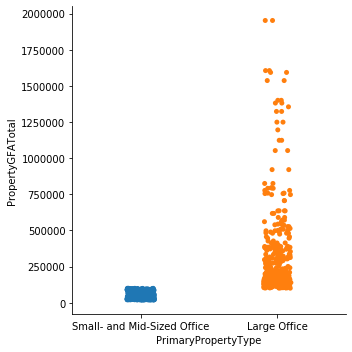

In [52]:
#We can visualise this
sns.catplot(x="PrimaryPropertyType", y="PropertyGFATotal", data=scatter_df);

In [53]:
#Max GFA for small and mid-sized offices
data[data['PrimaryPropertyType'] == 'Small- and Mid-Sized Office']['PropertyGFATotal'].max()

99440

In [54]:
#Min GFA for Large offices
data[data['PrimaryPropertyType'] == 'Large Office']['PropertyGFATotal'].min()

100734

Based on the above, we can agree that the cutoff for Gross Floor Area can be set at 100,000

In [55]:
#Replace the values
for i in data[(data['PrimaryPropertyType'] == 'Office') & (data['PropertyGFATotal'] < 100000)].index:
    data.loc[i, 'PrimaryPropertyType'] = "Small- and Mid-Sized Office"

#### 2. Neighborhood
- Delridge and DELRIDGE NEIGHBORHOODS with DELRIDGE
- Capitalizing all neighborhoods to avoid casing issues

In [56]:
#Capitalize the whole column
data['Neighborhood'] = data['Neighborhood'].str.upper()

#Replace Delridge Neighborhoods
data['Neighborhood'].replace("DELRIDGE NEIGHBORHOODS", "DELRIDGE", inplace = True)

#### 3. Largest Property Use Type (Primary, Second and Third)
- Combine "Other - Restaurant/Bar" with "Restaurant"
- Combine "Fast Food Restaurant" with "Restaurant"

In [57]:
#Replace restaurants
data['LargestPropertyUseType'].replace("Other - Restaurant/Bar", "Restaurant", inplace = True)
data['LargestPropertyUseType'].replace("Fast Food Restaurant", "Restaurant", inplace = True)
data['SecondLargestPropertyUseType'].replace("Other - Restaurant/Bar", "Restaurant", inplace = True)
data['SecondLargestPropertyUseType'].replace("Fast Food Restaurant", "Restaurant", inplace = True)
data['ThirdLargestPropertyUseType'].replace("Other - Restaurant/Bar", "Restaurant", inplace = True)
data['ThirdLargestPropertyUseType'].replace("Fast Food Restaurant", "Restaurant", inplace = True)

### Outliers / Impossible values

In [58]:
data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6.697000e+03,6697.000000,6.697000e+03,6.697000e+03,6697.000000,6697.000000,5093.000000,6695.000000,6696.000000,6697.000000,6697.000000,6.697000e+03,6.696000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6697.000000,6697.000000,6697.000000,6697.000000
mean,20863.322383,2015.502762,4.446170,1968.122742,1.071525,4.696133,9.296269e+04,9543.183814,8.341951e+04,7.716436e+04,13571.899253,1944.071584,67.906342,54.198148,57.325329,133.510303,138.356802,5.197298e+06,5.242736e+06,2.625076e+05,1.052458e+06,3.591058e+06,1.311223e+04,1.311223e+06,114.935638,1.081154,47.624035,-122.334905
std,11884.074506,0.500030,2.123813,33.040423,1.594810,5.481459,1.877483e+05,33912.835789,1.735735e+05,1.670855e+05,39739.313102,11718.222622,27.012124,55.114152,56.403103,135.677195,135.302508,1.814157e+07,1.501306e+07,3.704221e+06,3.659769e+06,1.248728e+07,5.685626e+04,5.685627e+06,478.876573,1.734763,0.047817,0.027143
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000,47.499170,-122.414250
25%,19934.000000,2015.000000,3.000000,1948.000000,1.000000,2.000000,2.847200e+04,0.000000,2.727300e+04,2.500000e+04,0.000000,0.000000,52.000000,27.600000,29.600000,74.000000,79.199997,9.206720e+05,9.822022e+05,0.000000e+00,1.867660e+05,6.372730e+05,0.000000e+00,0.000000e+00,9.450000,0.160000,47.599850,-122.350560
50%,23056.000000,2016.000000,4.000000,1974.000000,1.000000,4.000000,4.409800e+04,0.000000,4.223900e+04,3.953000e+04,0.000000,0.000000,75.000000,38.000000,40.900000,95.600000,102.099998,1.791716e+06,1.928932e+06,0.000000e+00,3.422434e+05,1.167735e+06,3.051000e+03,3.051000e+05,33.180000,0.540000,47.618560,-122.332630
75%,25876.000000,2016.000000,7.000000,1997.000000,1.000000,5.000000,8.955000e+04,0.000000,8.133600e+04,7.484000e+04,10211.000000,0.000000,90.000000,60.200000,65.000000,143.900000,149.800000,4.135650e+06,4.379070e+06,0.000000e+00,8.198140e+05,2.797320e+06,1.149639e+04,1.149639e+06,91.530000,1.280000,47.657084,-122.319762
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000,47.733870,-122.220470


Potential Issues to be investigated more closely: <br>
-Number of Buildings 0 and up to 111<br>
-Number of Floors (99?) According to Wiki, the tallest building in Seattle is 76 floors tall: https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Seattle<br>
-Negative values for PropertyGFAParking and for PropertyGFABuildings<br>
-Negative values for SourceEUI and SourceEUIWN<br>
-Negative values for Total GHG Emissions <br>
-0 Site Energy Use, Steam Use, Electricity, Natural Gas and Other Fuels (might be self-sustaining buildings but still seems strange)<br>

#### Number of Buildings

In [59]:
#Looking at list of buildings with 0 buildings
data[data['NumberofBuildings'] == 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
3403,89,2016,NonResidential,Medical Office,Polyclinic North && South,1978201270,3,EAST,1965,0.0,3.0,179014,0,179014,Medical Office,Medical Office,179014.0,NA,0.0,NA,0.0,NA,48.0,93.300003,92.300003,213.399994,210.300003,16701055.00,16527711.00,0.0,2.897563e+06,9886484.0,68145.703130,6814570.0,430.84,2.41,False,NA,Compliant,NA,47.61244,-122.32140,1200 Harvard Ave,Seattle,WA,98122,89_2016
3416,113,2016,NonResidential,Small- and Mid-Sized Office,KCTS9,1988200705,7,MAGNOLIA / QUEEN ANNE,1986,0.0,2.0,66240,2352,63888,"Data Center, Distribution Center, Office, Park...",Office,45900.0,Data Center,5181.0,Distribution Center,4551.0,NA,NaN,74.900002,75.400002,235.199997,236.600006,4166306.25,4192107.75,0.0,1.221074e+06,4166305.0,0.000000,0.0,29.04,0.44,False,NA,Compliant,NA,47.62391,-122.34837,401 Mercer St,Seattle,WA,98109,113_2016
3500,257,2016,NonResidential,Non-Refrigerated Warehouse,Harbor Island: Warehouse E - DNRP-SWD,7666703020,1,GREATER DUWAMISH,1916,0.0,4.0,79600,0,79600,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,79600.0,NA,0.0,NA,0.0,NA,34.0,30.299999,30.299999,95.099998,95.099998,2411402.25,2411402.25,0.0,7.067415e+05,2411402.0,0.000000,0.0,16.81,0.21,False,NA,Compliant,NA,47.57507,-122.35747,3235 16TH AVE SW,Seattle,WA,98134,257_2016
3541,322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),0656000005,7,DOWNTOWN,1968,0.0,3.0,100734,26731,74003,Office,Office,100734.0,NA,0.0,NA,0.0,NA,20.0,97.199997,98.199997,305.100006,308.399994,9788717.00,9892566.00,0.0,2.868908e+06,9788716.0,0.000000,0.0,68.24,0.68,False,NA,Compliant,NA,47.61757,-122.35122,2801 3rd Ave,Seattle,WA,98121,322_2016
3581,366,2016,NonResidential,Small- and Mid-Sized Office,University District Office Buiding,1142000500,4,NORTHEAST,1961,0.0,5.0,99005,0,99005,Office,Office,79555.0,NA,0.0,NA,0.0,NA,70.0,59.400002,63.000000,137.600006,140.699997,4728488.50,5008123.50,0.0,8.391593e+05,2863212.0,18652.765630,1865277.0,119.03,1.20,False,NA,Compliant,NA,47.66100,-122.31626,1107 NE 45th St,Seattle,WA,98105,366_2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,49729,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Oakwood SeattleSouth LakeUnion (Hue),2249000255,7,MAGNOLIA / QUEEN ANNE,2012,0.0,7.0,119219,0,119219,Multifamily Housing,Multifamily Housing,131890.0,NA,0.0,NA,0.0,NA,99.0,23.200001,24.900000,50.299999,53.900002,3063969.75,3288605.50,0.0,4.798908e+05,1637387.0,14265.820310,1426582.0,87.18,0.73,False,NA,Compliant,NA,47.62600,-122.34278,717 Dexter Ave North,Seattle,WA,98109,49729_2016
6542,49779,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Ernestine Anderson Place,3319501010,3,CENTRAL,2013,0.0,6.0,38407,0,38407,Multifamily Housing,Multifamily Housing,43793.0,NA,0.0,NA,0.0,NA,50.0,32.599998,34.500000,102.400002,108.199997,1427482.75,1509575.75,0.0,4.183712e+05,1427482.0,0.000000,0.0,9.95,0.26,False,NA,Compliant,NA,47.59946,-122.30561,2010 S Jackson Street,Seattle,WA,98144,49779_2016
6545,49783,2016,NonResidential,Laboratory,UW Medicine Phase 3.1,1988201435,7,LAKE UNION,2013,0.0,8.0,339591,

In [60]:
#Looks like most of them are from 2016
data[data['NumberofBuildings'] == 0]['DataYear'].value_counts()

2016    92
Name: DataYear, dtype: int64

In [61]:
#Let's check what the values were in 2015

#Creating a list of buildings IDs
buildings_0 = data[data['NumberofBuildings'] == 0]['OSEBuildingID'].tolist()

#Returning the different values for number of buildings in both 2015 and 2016
data[data['OSEBuildingID'].isin(buildings_0)]['NumberofBuildings'].value_counts()

0.0    92
1.0    92
Name: NumberofBuildings, dtype: int64

In [62]:
#Looks like all these buildings should have a value of 1, not 0, we can update them.
for i in data[data['OSEBuildingID'].isin(buildings_0)].index:
    data.loc[i,'NumberofBuildings'] = 1

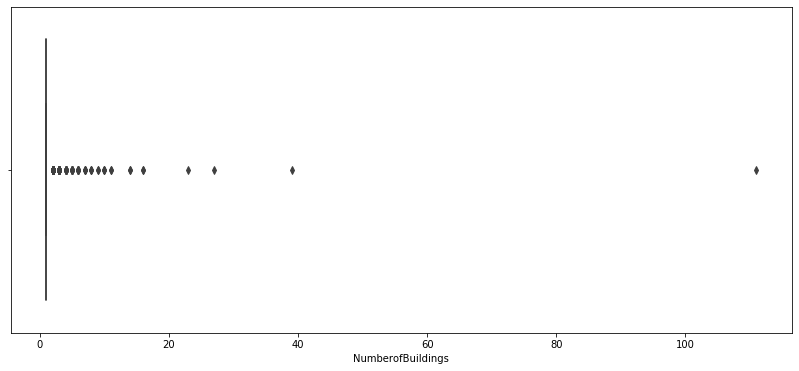

In [63]:
#Checking distribution of Number of Buildings
sns.boxplot(data['NumberofBuildings'])

In [64]:
#Let's take a look at the outliers more closely
data[data['NumberofBuildings'] >20]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
1508,22062,2015,Campus,College/University,SEATTLE UNIVERSITY (MAIN CAMPUS),2254500880,3,EAST,1939,39.0,2.0,2200000,0,2200000,"College/University, Parking",College/University,1719643.0,Parking,318960.0,NA,0.0,NA,NaN,66.900000,76.400000,146.100000,158.300000,115080128.0,131427232.0,0.0,18292370.0,62416157.0,526666.00000,52666569.0,3232.23,1.35,No,NA,Compliant,NA,47.608697,-122.314594,901 12TH AVE,SEATTLE,WA,98122,22062_2015
3445,172,2016,Campus,College/University,SSCC MAIN CAMPUS,6171900005,1,DELRIDGE,1970,27.0,2.0,441071,0,441071,College/University,College/University,483000.0,NA,0.0,NA,0.0,NA,NaN,79.300003,85.199997,192.800003,202.600006,38301744.0,41151732.0,0.0,7419277.5,25314575.0,129871.66410,12987166.0,866.23,1.96,False,NA,Compliant,NA,47.547000,-122.353070,6000 16th Ave SW,Seattle,WA,98106,172_2016
5202,23622,2016,Campus,Other,FT C15 Fishermen's Center,7666200105,7,MAGNOLIA / QUEEN ANNE,1955,23.0,1.0,260241,0,260241,Other,Other,260241.0,NA,0.0,NA,0.0,NA,NaN,130.699997,138.500000,353.200012,374.500000,34012980.0,36034584.0,0.0,7882361.0,26894616.0,71183.61719,7118362.0,565.55,2.17,False,NA,Compliant,NA,47.655610,-122.380630,1900 West Nickerson Street,Seattle,WA,98119,23622_2016
6614,49967,2016,Campus,College/University,University of Washington - Seattle Campus,1625049001,4,NORTHEAST,1900,111.0,0.0,9320156,0,9320156,College/University,College/University,9320156.0,NA,0.0,NA,0.0,NA,NaN,93.800003,0.000000,246.600006,0.000000,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.00000,0.0,11140.56,1.20,False,NA,Compliant,NA,47.656440,-122.310410,NE 45th St & Brooklyn Ave,Seattle,WA,98105,49967_2016


In [65]:
#The universities make sense but the Fisherman's center seems strange
data[data['OSEBuildingID'] == 23622]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
1881,23622,2015,Campus,Other,FISHERMAN'S TERMINAL - CAMPUS,7666200105,7,MAGNOLIA / QUEEN ANNE,1955,1.0,1.0,260241,0,260241,Other,Other,260241.0,NA,0.0,NA,0.0,NA,NaN,125.600000,137.7,337.500000,370.2,32675250.0,35823228.0,0.0,7504491.0,25606386.0,70699.00000,7069925.0,553.99,1.71,No,NA,Compliant,NA,47.658022,-122.382892,2000 W EMERSON PL,SEATTLE,WA,98119,23622_2015
5202,23622,2016,Campus,Other,FT C15 Fishermen's Center,7666200105,7,MAGNOLIA / QUEEN ANNE,1955,23.0,1.0,260241,0,260241,Other,Other,260241.0,NA,0.0,NA,0.0,NA,NaN,130.699997,138.5,353.200012,374.5,34012980.0,36034584.0,0.0,7882361.0,26894616.0,71183.61719,7118362.0,565.55,2.17,False,NA,Compliant,NA,47.655610,-122.380630,1900 West Nickerson Street,Seattle,WA,98119,23622_2016


Doing a bit of research, we find that this center is a campus with a number of buildings. What isn't very clear is whether the above lines refer to the main building (C-15) or the whole campus.<br>

However, given that the Building Type is Campus, we can assume it is referring to the collection of buildings. <br>

We can verify this by checking the Energy Use for buildings with a single building to see how it compares<br>

In [66]:
#Pivoting to see median energy use given the number of buildings
data.pivot_table('SiteEnergyUse(kBtu)', index = 'NumberofBuildings', aggfunc = 'median')

,SiteEnergyUse(kBtu)
NumberofBuildings,
1.0,1.767017e+06
2.0,1.806712e+06
3.0,6.582088e+06
4.0,4.691946e+06
5.0,3.834588e+06
6.0,5.223417e+06
7.0,1.027252e+08
8.0,1.847034e+07
9.0,1.474896e+08


<b>Conclusion: </b> The Energy Use seems to fit very well for a building composed of 23 buildings, it would be much too high for a building composed of a single building. Let's correct the 2015 value to 23 buildings.

In [67]:
#Updating value for number of buildings to 23.
for i in data[data['OSEBuildingID'] == 23622].index:
    data.loc[i,'NumberofBuildings'] = 23

#### Number of Floors

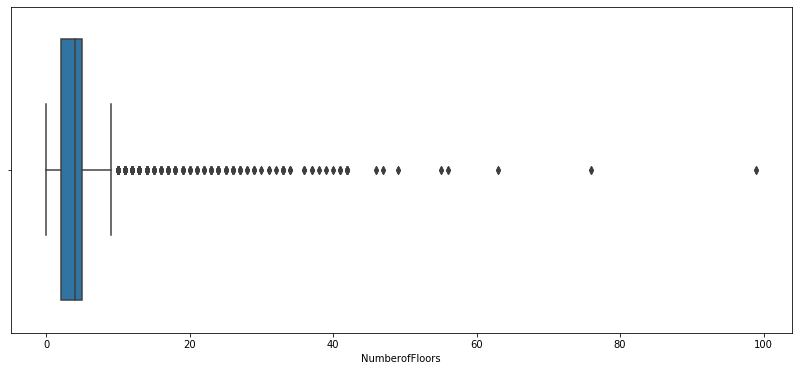

In [68]:
#Make a boxplot to look at distribution
sns.boxplot(data['NumberofFloors'])

In [69]:
#This distribution is not strange considering the variable that we are looking at, many more buildings have a low number of floors.
#That being said, there are 3 extreme values (>60 floors), let's look at these
data[data['NumberofFloors'] >60]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
235,357,2015,Nonresidential COS,Large Office,SEATTLE MUNICIPAL TOWER,942000720,3,DOWNTOWN,1990,1.0,63.0,1195387,159600,1035787,"Office, Other, Parking",Office,1187924.0,Parking,159599.0,Other,18656.0,"2014, 2013, 2011, 2010, 2009, 2008, 2007",82.0,53.600000,54.600000,168.400000,171.300000,6.471565e+07,6.584274e+07,0.0,18960680.0,64696526.0,218.00000,21804.0,452.16,0.15,No,NA,Compliant,NA,47.604911,-122.328916,700 5TH AVE,SEATTLE,WA,98104,357_2015
581,775,2015,NonResidential,Large Office,COLUMBIA CENTER,942000640,7,DOWNTOWN,1985,1.0,76.0,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NA,0.0,"2016, 2015, 2012, 2009, 2007, 2006",84.0,56.300000,55.500000,171.900000,169.100000,9.456009e+07,9.325544e+07,0.0,26597630.0,90754881.0,38090.00000,3808965.0,834.96,0.23,No,NA,Compliant,NA,47.604660,-122.330286,701 5TH AVE,SEATTLE,WA,98104,775_2015
1371,21611,2015,NonResidential,Worship Facility,CHINESE BAPTIST CHURCH,2124049098,2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,21948,Worship Facility,Worship Facility,21948.0,NA,0.0,NA,0.0,NA,54.0,14.500000,14.500000,45.500000,45.500000,3.182050e+05,3.182050e+05,0.0,93261.0,318218.0,0.00000,0.0,2.22,0.04,Yes,NA,Compliant,NA,47.550571,-122.302943,5801 BEACON AVE S,SEATTLE,WA,98108,21611_2015
3573,357,2016,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),0942000720,3,DOWNTOWN,1990,1.0,63.0,1354987,159600,1195387,"Office, Parking",Office,1191115.0,Parking,159599.0,Other,18656.0,2014201320112010200920082007,89.0,50.400002,50.400002,158.100006,158.100006,6.157618e+07,6.157618e+07,0.0,18046946.0,61576180.0,0.00000,0.0,429.27,0.32,False,NA,Compliant,NA,47.605010,-122.329880,700 Fifth Avenue,Seattle,WA,98104,357_2016
3899,775,2016,NonResidential,Large Office,Columbia Center - 2015,0942000640,7,DOWNTOWN,1985,1.0,76.0,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NA,0.0,2017201620152012200920072006,86.0,55.299999,55.099998,167.300003,166.500000,9.293764e+07,9.253726e+07,0.0,25747908.0,87851862.0,50857.63281,5085763.0,882.56,0.45,False,NA,Compliant,NA,47.604540,-122.330720,701 5th Avenue,Seattle,WA,98104,775_2016
4699,21611,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,2124049098,2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,21948,Worship Facility,Worship Facility,21948.0,NA,0.0,NA,0.0,NA,80.0,14.900000,14.900000,46.599998,46.599998,3.260012e+05,3.260012e+05,0.0,95545.5,326001.0,0.00000,0.0,2.27,0.10,False,NA,Compliant,NA,47.550720,-122.302650,5801 Beacon Avenue South,Seattle,WA,98108,21611_2016


<b>Conclusion:</b> The first two buildings make sense as they are the two tallest buildings in Seattle. The Chinest Baptist Church is clearly a mistake, however. Let's find the median number of floors for buildings of this category and see what the real number could be.

In [70]:
#Replace value for this row by median number of floors for buildings of this category
#Find the Median for Worship Facilities
worship_median = data[data['PrimaryPropertyType'] == 'Worship Facility']['NumberofFloors'].median()

for i in data[data['OSEBuildingID'] == 21611].index:
    data.loc[i,'NumberofFloors'] = worship_median

#### GFA Parking

In [71]:
#We noticed some negative values for GFA Parking, which can't make sense. Let's take a look.
data[data['PropertyGFAParking']<0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
2428,25530,2015,Multifamily MR (5-9),Mid-Rise Multifamily,WATER'S EDGE,9197580000,2,SOUTHEAST,1964,1.0,5.0,20967,-3,20970,Multifamily Housing,Multifamily Housing,20967.0,NA,0.0,NA,0.0,NA,81.0,25.7,27.5,80.8,86.4,539271.0,576638.0,0.0,158051.0,539293.0,0.0,0.0,3.76,0.07,No,NA,Compliant,NA,47.520564,-122.260260,9530 RAINIER AVE S,SEATTLE,WA,98118,25530_2015
3136,29551,2015,NonResidential,Small- and Mid-Sized Office,625 5TH AVE S,8809700040,2,DOWNTOWN,2000,1.0,11.0,68452,-2,68454,"Bank Branch, Office",Office,61665.0,Bank Branch,6787.0,NA,0.0,"2016, 2015",81.0,53.6,58.3,168.4,182.9,3670298.0,3988260.0,0.0,1075703.0,3670451.0,0.0,0.0,25.59,0.14,No,NA,Compliant,NA,47.597252,-122.327747,625 5TH AVE S,SEATTLE,WA,98104,29551_2015


It appears that the GFA Parking might be calculated automatically as GFA Total - GFA Building, which would result in the values we see above. This is obviously incorrect.

Median value: 0.0


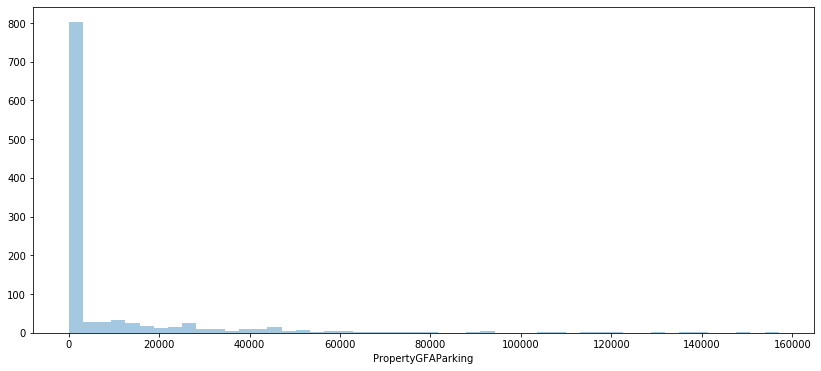

In [72]:
#Check distribution of Mid-Rise Multifamily buildings
sns.distplot(data[data['PrimaryPropertyType'] == 'Mid-Rise Multifamily']['PropertyGFAParking'], kde = False)
print(f"Median value: {data[data['PrimaryPropertyType'] == 'Mid-Rise Multifamily']['PropertyGFAParking'].median()}")

Median value: 0.0


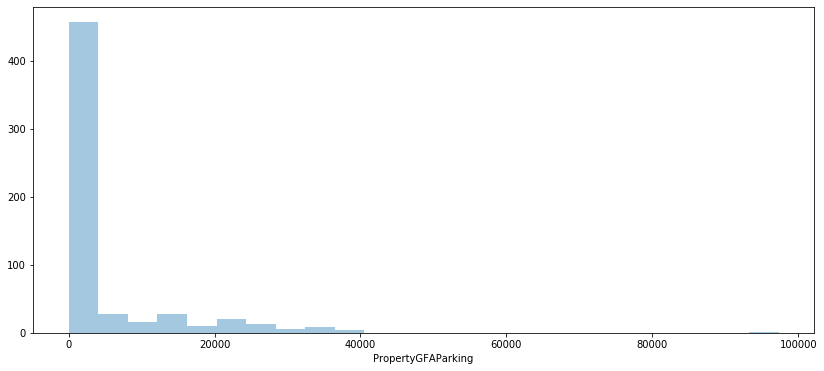

In [73]:
#Check distribution of Mid-Rise Multifamily buildings
sns.distplot(data[data['PrimaryPropertyType'] == 'Small- and Mid-Sized Office']['PropertyGFAParking'], kde = False)
print(f"Median value: {data[data['PrimaryPropertyType'] == 'Small- and Mid-Sized Office']['PropertyGFAParking'].median()}")

In [74]:
#Most logical approach is to convert these values to 0 and to update the values of GFA Building to the same value as GFATotal

for i in data[data['PropertyGFAParking'] < 0].index:
    
    #Find category of applicable values
    cat = data.iloc[i]['PrimaryPropertyType']
    
    #Find median GFA for this type of Property
    median = data[data['PrimaryPropertyType'] == cat]['PropertyGFAParking'].median()
    
    #Replace negative value by Median
    print(f"Replacing:{data.loc[i, 'PropertyGFAParking']} on line {i} by {median}")
    data.loc[i, 'PropertyGFAParking'] = median

    #Replace GFA Building by GFA Total
    data.loc[i, 'PropertyGFABuilding(s)'] = data.loc[i, 'PropertyGFATotal']

Replacing:-3 on line 2428 by 0.0
Replacing:-2.0 on line 3136 by 0.0


In [75]:
#Same issue with Buildings
data[data['PropertyGFABuilding(s)']<0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
3139,29788,2015,NonResidential,Small- and Mid-Sized Office,QUEEN ANNE SQUARE WEST (2013),7015350000,7,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,54015,97325.0,-43310,Office,Office,54015.0,NA,0.0,NA,0.0,NA,65.0,64.0,64.0,200.9,200.9,3455247.0,3455247.0,0.0,1012675.0,3455391.0,0.0,0.0,24.09,0.17,No,NA,Compliant,NA,47.624968,-122.359705,220 W MERCER ST,SEATTLE,WA,98119,29788_2015
3322,50002,2015,NonResidential,Other,FREEWAY MOTORS UNIVERSITY AUDI,6746701515,4,NORTHEAST,2014,1.0,3.0,33648,84198.0,-50550,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,NA,0.0,NA,NaN,35.6,35.6,111.9,111.9,1389553.0,1389553.0,0.0,407255.0,1389610.0,0.0,0.0,9.69,0.11,No,NA,Compliant,NA,47.664111,-122.316639,4741 11TH AVE NE,SEATTLE,WA,98105,50002_2015


In [76]:
#This only seems to be an issue in 2015, let's check the values for 2016
data[data['OSEBuildingID'].isin([29788, 50002])]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
3139,29788,2015,NonResidential,Small- and Mid-Sized Office,QUEEN ANNE SQUARE WEST (2013),7015350000,7,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,54015,97325.0,-43310,Office,Office,54015.0,NA,0.0,NA,0.0,NA,65.0,64.000000,64.000000,200.900000,200.900000,3455247.000,3455247.000,0.0,1.012675e+06,3455391.0,0.0,0.0,24.09,0.17,No,NA,Compliant,NA,47.624968,-122.359705,220 W MERCER ST,SEATTLE,WA,98119,29788_2015
3322,50002,2015,NonResidential,Other,FREEWAY MOTORS UNIVERSITY AUDI,6746701515,4,NORTHEAST,2014,1.0,3.0,33648,84198.0,-50550,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,NA,0.0,NA,NaN,35.600000,35.600000,111.900000,111.900000,1389553.000,1389553.000,0.0,4.072550e+05,1389610.0,0.0,0.0,9.69,0.11,No,NA,Compliant,NA,47.664111,-122.316639,4741 11TH AVE NE,SEATTLE,WA,98105,50002_2015
6438,29788,2016,NonResidential,Small- and Mid-Sized Office,Queen Anne Square West (220),7015350000,7,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,54015,0.0,54015,Office,Office,54015.0,NA,0.0,NA,0.0,NA,75.0,55.900002,55.900002,175.600006,175.600006,3020001.500,3020001.500,0.0,8.851117e+05,3020001.0,0.0,0.0,21.05,0.39,False,NA,Compliant,NA,47.624950,-122.360360,220 West Mercer Street,Seattle,WA,98119,29788_2016
6634,50002,2016,NonResidential,Other,Audi Seattle UVA Bldg,6746701515,4,NORTHEAST,2014,1.0,3.0,33648,0.0,33648,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,NA,0.0,NA,NaN,35.900002,35.900002,112.699997,112.699997,1399581.625,1399581.625,0.0,4.101939e+05,1399582.0,0.0,0.0,9.76,0.29,False,NA,Compliant,NA,47.664140,-122.316640,4741 11TH AVE NE,Seattle,WA,98105,50002_2016


In [77]:
#Indeed, Parking should have been 0, let's correct this.

for i in data[data['PropertyGFABuilding(s)']<0].index:
    
    #Convert Parking GFA to 0
    data.loc[i,'PropertyGFAParking'] = 0
    
    #Convert GFA Building to equal Total
    data.loc[i,'PropertyGFABuilding(s)'] = data.loc[i,'PropertyGFATotal']

#### Source EUI

In [78]:
#It doesn't seem right that we have negative values for SourceEUI, let's investigate
df_2015[df_2015['SourceEUI(kBtu/sf)'] <0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier
3246,49784,2015,NonResidential,Small- and Mid-Sized Office,BULLITT CENTER,7234600195,"{'latitude': '47.61434963', 'longitude': '-122...",3,CENTRAL,2013,1,6.0,41929,0,41929,Office,Office,48159.0,NaN,NaN,NaN,NaN,NaN,100.0,11.7,11.7,-2.0,-2.0,562479.0,562479.0,0.0,164853.0,562503.0,0.0,0.0,3.92,0.04,No,NaN,Compliant,Low Outlier


In [79]:
data[data['OSEBuildingID'] == 49784]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
3246,49784,2015,NonResidential,Small- and Mid-Sized Office,BULLITT CENTER,7234600195,3,CENTRAL,2013,1.0,6.0,41929,0.0,41929,Office,Office,48159.0,NA,0.0,NA,0.0,NA,100.0,11.7,11.7,-2.0,-2.0,562479.0000,562479.0000,0.0,164853.00000,562503.0,0.0,0.0,3.92,0.04,No,NA,Compliant,LOW OUTLIER,47.61435,-122.312464,1501 E MADISON ST,SEATTLE,WA,98122,49784_2015
6546,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,7234600195,3,CENTRAL,2013,1.0,6.0,52000,0.0,52000,Office,Office,48159.0,NA,0.0,NA,0.0,NA,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,-0.80,-0.02,False,NA,Compliant,NA,47.61432,-122.312570,1501 E. Madison St.,Seattle,WA,98122,49784_2016


According to data notes "Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution."<br>

Given that it should be in theory possible to have a negative source energy use (if using renewable energy and producing more than is consumed), I guess it is possible for this number to be negative.<br>

Turns out this particular building is exemplary in terms of energy consumption: https://www.engineering.com/ElectronicsDesign/ElectronicsDesignArticles/ArticleID/7399/Bullitt-Center-Seattles-Net-Zero-Energy-Building.aspx

In [80]:
#Even though this is a real value, it is quite clearly an example of an outlier and should be removed from our dataset
for i in data[data['OSEBuildingID'] == 49784].index:
    data.drop(i, inplace = True)

#### Energy Use

Energy Use is one of our target variables so we should ensure that the values in this column make sense and are free of outliers.

In [81]:
#Checking rows with 0 energy use
data[data['SiteEnergyUse(kBtu)'] <= 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1975700365,7,DOWNTOWN,1920,1.0,2.0,57428,0.0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,Other,9783.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.00,0.00,No,NA,Compliant,NA,47.610764,-122.337677,1525 4TH AVE,SEATTLE,WA,98101,58_2015
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1975200005,7,DOWNTOWN,1929,1.0,27.0,216571,13320.0,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,Other - Technology/Science,6246.0,"2014, 2013, 2012, 2008",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.00,0.00,No,NA,Compliant,NA,47.607655,-122.335512,1218 3RD AVE,SEATTLE,WA,98101,765_2015
3368,34,2016,SPS-District K-12,K-12 School,Meany Building,0688000090,3,CENTRAL,1955,1.0,1.0,126351,0.0,126351,K-12 School,K-12 School,126351.0,NA,0.0,NA,0.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.00,0.00,False,NA,Missing Data,NA,47.622660,-122.305470,301/300 21st Ave. E.,Seattle,WA,98112,34_2016
3371,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,0809000005,7,MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,51582,0.0,51582,K-12 School,K-12 School,55166.0,NA,0.0,NA,0.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,10.43,0.20,False,NA,Missing Data,NA,47.632900,-122.351720,201 Garfield St.,Seattle,WA,98109,37_2016
3402,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,2518400005,1,SOUTHWEST,1948,1.0,2.0,53352,0.0,53352,K-12 School,K-12 School,65568.0,NA,0.0,NA,0.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176088.0938,600813.0,0.000000,0.0,4.19,0.08,False,NA,Missing Data,NA,47.509700,-122.377590,3701 S.W. 104th St.,Seattle,WA,98146,87_2016
3421,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1324039116,1,DELRIDGE,1999,1.0,3.0,74468,0.0,74468,K-12 School,K-12 School,75364.0,NA,0.0,NA,0.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,11.84,0.16,False,NA,Missing Data,NA,47.563600,-122.358000,1901 SW Genesee St.,Seattle,WA,98106,118_2016
3425,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,1524049002,2,SOUTHEAST,1991,1.0,2.0,58933,0.0,58933,K-12 School,K-12 School,60725.0,NA,0.0,NA,0.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,16.36,0.28,False,NA,Missing Data,NA,47.573240,-122.290580,3301 S. Horton St.,Seattle,WA,98144,122_2016
3435,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,1931301145,6,LAKE UNION,1991,1.0,3.0,66588,0.0,66588,K-12 School,K-12 School,66588.0,NA,0.0,NA,0.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,14.67,0.22,False,NA,Missing Data,NA,47.654640,-122.349120,3921 Linden Ave. N.,Seattle,WA,98103,140_2016
3473,217,2016,SPS-District K-12,K-12 School,Whitman Middle,3526039131,6,BALLARD,1959,1.0,1.0,160270,0.0,160270,K-12 School,K-12 School,160270.0,NA,0.0,NA,0.0,NA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,229.38,1.43,False,NA,Missing Data,NA,47.696750,-122.377600,9201 15th Ave. NW.,Seattle,WA,98117,217_2016
3479,227,2016,SPS-District K-12,K-12 School,Washington Middle,3646100540,3,CENTRA

<b>Conclusion:</b> Dropping only records where <b>both</b> the energy use and emissions are at 0. Two separate datasets will be made at the end where 0 values will be removed.

In [82]:
#Checking impact of dropping these rows
drop = len(data[(data['TotalGHGEmissions'] == 0) & (data['SiteEnergyUse(kBtu)'] == 0)]) / len(data)
print(f"This will remove {round(drop*100,2)}% of the data")

This will remove 0.13% of the data


In [83]:
#Dropping the values with 0 energy use and 0 emissions
data.drop(data[(data['TotalGHGEmissions'] == 0) & (data['SiteEnergyUse(kBtu)'] == 0)].index, inplace = True)

In [84]:
data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
count,6686.000000,6686.000000,6686.000000,6686.000000,6686.000000,6686.000000,6.686000e+03,6686.000000,6.686000e+03,6.686000e+03,6686.000000,6686.000000,5090.000000,6686.000000,6685.000000,6686.000000,6686.000000,6.686000e+03,6.685000e+03,6.686000e+03,6.686000e+03,6.686000e+03,6.686000e+03,6.686000e+03,6686.000000,6686.000000,6686.000000,6686.000000
mean,20870.028717,2015.502393,4.444960,1968.120850,1.088693,4.666019,9.280190e+04,9529.743344,8.327216e+04,7.703598e+04,13485.827894,1944.872629,67.887426,54.268292,57.417158,133.729958,138.585043,5.205713e+06,5.251243e+06,2.629395e+05,1.054170e+06,3.596900e+06,1.313380e+04,1.313380e+06,115.124267,1.082930,47.623990,-122.334922
std,11869.981477,0.500032,2.124377,33.035464,1.613537,5.229958,1.872070e+05,33909.809173,1.729424e+05,1.667683e+05,38907.862766,11727.132787,27.008839,55.117842,56.403823,135.680550,135.296601,1.815530e+07,1.502394e+07,3.707252e+06,3.662535e+06,1.249672e+07,5.690053e+04,5.690053e+06,479.247795,1.735637,0.047800,0.027156
min,1.000000,2015.000000,1.000000,1900.000000,1.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,47.499170,-122.414250
25%,19946.250000,2015.000000,3.000000,1948.000000,1.000000,2.000000,2.846775e+04,0.000000,2.727225e+04,2.500000e+04,0.000000,0.000000,52.000000,27.700000,29.600000,74.200000,79.300003,9.240850e+05,9.847240e+05,0.000000e+00,1.874113e+05,6.394470e+05,0.000000e+00,0.000000e+00,9.472500,0.160000,47.599823,-122.350641
50%,23065.000000,2016.000000,4.000000,1974.000000,1.000000,4.000000,4.409200e+04,0.000000,4.218900e+04,3.951700e+04,0.000000,0.000000,75.000000,38.000000,40.900002,95.750000,102.199998,1.795256e+06,1.931349e+06,0.000000e+00,3.429328e+05,1.170112e+06,3.086500e+03,3.086270e+05,33.270000,0.540000,47.618580,-122.332632
75%,25876.000000,2016.000000,7.000000,1997.000000,1.000000,5.000000,8.955000e+04,0.000000,8.132700e+04,7.483775e+04,10208.000000,0.000000,90.000000,60.275000,65.000000,144.000000,149.800003,4.152736e+06,4.382121e+06,0.000000e+00,8.199569e+05,2.797734e+06,1.151039e+04,1.151046e+06,91.650000,1.280000,47.657080,-122.319775
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,76.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000,47.733870,-122.220470


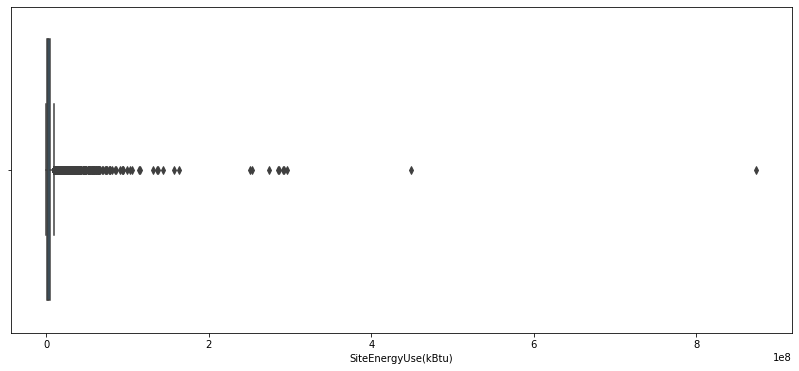

In [85]:
#Visualising distribution
sns.boxplot(data['SiteEnergyUse(kBtu)'])

In [86]:
#Checking buildings with energy use above 2.0*10^8
data[data['SiteEnergyUse(kBtu)'] > 2*10**8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
123,198,2015,NonResidential,Hospital,SEATTLE CHILDREN'S HOSPITAL (MAIN CAMPUS),2982800005,4,NORTHEAST,1953,1.0,10.0,879000,0.0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NA,0.0,NA,0.0,NA,13.0,285.800000,290.900000,572.900000,561.700000,251191824.0,255669168.0,0.0,33629360.0,114748139.0,1.364484e+06,136448438.0,8046.70,8.59,No,NA,Compliant,NA,47.663567,-122.281383,4800 SAND POINT WAY NE,SEATTLE,WA,98105,198_2015
170,276,2015,NonResidential,Hospital,HARBORVIEW MEDICAL CENTER,8590900220,3,EAST,2000,1.0,8.0,1158691,0.0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NA,0.0,NA,30.0,219.100000,220.500000,508.500000,498.300000,295812640.0,297740960.0,122701720.0,50083380.0,170891586.0,2.226400e+04,2226424.0,10780.64,8.67,No,NA,Compliant,NA,47.603871,-122.322700,325 9TH AVE,SEATTLE,WA,98104,276_2015
560,753,2015,NonResidential,Other,THE WESTIN BUILDING,659000950,7,DOWNTOWN,1981,1.0,33.0,429405,0.0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NA,0.0,NA,71.0,663.400000,663.400000,2082.300000,2082.300000,284867168.0,284867168.0,0.0,83445048.0,284726322.0,1.526000e+03,152639.0,1992.96,1.79,No,NA,Compliant,NA,47.614353,-122.338860,2001 6TH AVE,SEATTLE,WA,98121,753_2015
621,828,2015,NonResidential,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,1978201096,3,EAST,1994,1.0,14.0,1765970,0.0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NA,0.0,NA,59.0,174.900000,178.600000,374.600000,372.000000,286685536.0,292746272.0,127869744.0,41161340.0,140448322.0,1.837330e+05,18373320.0,11824.89,6.35,No,NA,Compliant,NA,47.608951,-122.322402,747 BROADWAY,SEATTLE,WA,98122,828_2015
3375,43,2016,Campus,Mixed Use Property,Plant 2 Site,0022000005,2,GREATER DUWAMISH,1992,1.0,3.0,494835,0.0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NA,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,False,NA,Compliant,NA,47.534930,-122.317880,7755 E MARGINAL WAY S,Seattle,WA,98108,43_2016
3464,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,2982800005,4,NORTHEAST,1953,6.0,10.0,879000,0.0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NA,0.0,NA,0.0,NA,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,8145.52,9.27,False,NA,Compliant,NA,47.662310,-122.281460,4800 Sand Point Way NE,Seattle,WA,98105,198_2016
3510,276,2016,NonResidential,Hospital,Harborview Medical Center,8590900220,3,EAST,2000,9.0,8.0,1158691,0.0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NA,0.0,NA,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,10734.57,9.26,False,NA,Compliant,NA,47.603990,-122.323770,325 9th Ave.,Seat

In [87]:
#We notice right away that 3 of these buildings are hospitals so there seems to be a pattern. Creating a pivot to see the median energy use per category
pivot = data.pivot_table('SiteEnergyUse(kBtu)', index = 'PrimaryPropertyType', aggfunc = 'median')

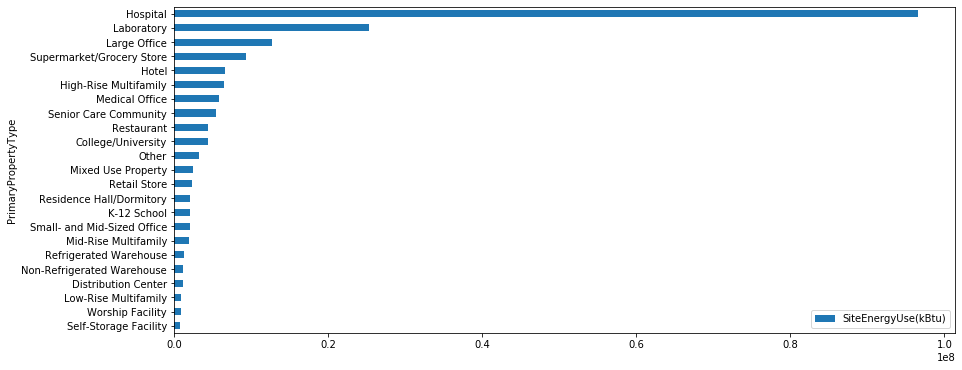

In [88]:
#We see that Hospitals tend to use a large amount of energy, which makes sense from a logical perspective. 
pivot.sort_values('SiteEnergyUse(kBtu)').plot(kind = 'barh');

<b>Conclusion:</b> The three hospitals and the very large university make sense. The Westin Building is a bit more difficult to determine, however, given that it is a large building with 33 floors, it doesn't seem impossible that it would have such a high energy use. I am choosing to keep all these data points in the dataset.

#### CO2 Emissions

In [89]:
#Minimum value seems very low, let's check out the lowest 10 values
data.nsmallest(20, 'TotalGHGEmissions')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Key
3853,700,2016,NonResidential,Supermarket/Grocery Store,IUC- Whole Foods Interbay,7666201460,7,MAGNOLIA / QUEEN ANNE,2008,1.0,1.0,57176,0.0,57176,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,39500.000000,Retail Store,15000.0,"Personal Services (Health/Beauty, Dry Cleaning...",5500.0,NA,31.0,208.800003,214.100006,0.0,0.0,1.252517e+07,1.284386e+07,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,False,NA,Compliant,NA,47.637180,-122.377340,2001 15th Avenue West,Seattle,WA,98119,700_2016
4663,21524,2016,Multifamily LR (1-4),Low-Rise Multifamily,Minor Tower Apartments,2025049091,4,LAKE UNION,1974,1.0,4.0,37361,4735.0,32626,Multifamily Housing,Multifamily Housing,27732.000000,NA,0.0,NA,0.0,NA,61.0,31.700001,33.200001,0.0,0.0,8.801155e+05,9.197677e+05,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,False,NA,Compliant,NA,47.642720,-122.328660,2525 Minor Ave E,Seattle,WA,98102,21524_2016
1916,23730,2015,NonResidential,Non-Refrigerated Warehouse,SALMON BAY TERMINALS - RSVP BLDG,7666200120,7,MAGNOLIA / QUEEN ANNE,1948,1.0,1.0,46970,0.0,46970,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,46970.000000,NA,0.0,NA,0.0,NA,NaN,0.200000,0.200000,0.8,0.8,1.144100e+04,1.144100e+04,0.0,3353.000000,11442.0,0.0,0.0,0.08,0.00,No,NA,Compliant,NA,47.656859,-122.375239,4021 13TH AVE W,SEATTLE,WA,98119,23730_2015
6681,50071,2016,Multifamily MR (5-9),Mid-Rise Multifamily,The Westside Off Broadway,6003501185,3,EAST,2015,1.0,7.0,41384,15062.0,26322,"Multifamily Housing, Other - Restaurant/Bar, P...",Multifamily Housing,34643.000000,Parking,8266.0,"Personal Services (Health/Beauty, Dry Cleaning...",1714.0,NA,100.0,0.400000,0.400000,1.1,1.1,1.340900e+04,1.340900e+04,0.0,3930.000000,13409.0,0.0,0.0,0.09,0.00,False,NA,Non-Compliant,LOW OUTLIER,47.621070,-122.321560,801 E Thomas St,Seattle,WA,98102,50071_2016
2212,24717,2015,NonResidential,Other,1701 1ST AVE S,7666207085,2,GREATER DUWAMISH,1910,1.0,3.0,27690,0.0,27690,"Other, Parking",Other,24717.000000,Parking,0.0,NA,0.0,NA,NaN,0.700000,0.700000,2.2,2.2,1.715000e+04,1.715000e+04,0.0,5026.000000,17150.0,0.0,0.0,0.12,0.00,No,NA,Compliant,NA,47.587876,-122.334577,1701 1ST AVE S,SEATTLE,WA,98134,24717_2015
5529,24717,2016,NonResidential,Other,1701 First Ave South LLC,7666207085,2,GREATER DUWAMISH,1910,1.0,3.0,27690,0.0,27690,"Other, Parking",Other,24717.000000,Parking,0.0,NA,0.0,NA,NaN,0.700000,0.700000,2.1,2.2,1.680890e+04,1.726000e+04,0.0,4926.399902,16809.0,0.0,0.0,0.12,0.00,False,NA,Non-Compliant,LOW OUTLIER,47.587880,-122.334580,1701 First Ave South,Seattle,WA,98134,24717_2016
1306,21474,2015,NonResidential,Other,SULTAN HOTEL/LUSTY LADY,1976200060,7,DOWNTOWN,1900,1.0,3.0,49760,0.0,49760,Other,Other,24019.000000,NA,0.0,NA,0.0,NA,NaN,1.000000,1.000000,3.2,3.2,2.412600e+04,2.412600e+04,0.0,7071.000000,24127.0,0.0,0.0,0.17,0.00,No,NA,Compliant,NA,47.607051,-122.339036,1315 1ST AVE,SEATTLE,WA,98101,21474_2015
4569,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1975700135,7,DOWNTOWN,1903,1.0,3.0,57720,0.0,57720,Office,Office,25000.000000,NA,0.0,NA,0.0,NA,NaN,1.000000,1.000000,3.0,3.0,2.410550e+04,2.410550e+04,0.0,7064.899902,24105.0,0.0,0.0,0.17,0.00,False,NA,Non-Compliant,LOW OUTLIER,4

<b>Conclusion:</b>The low values seem OK but the values at 0 will be removed at the end of the notebook when making the separate datasets.

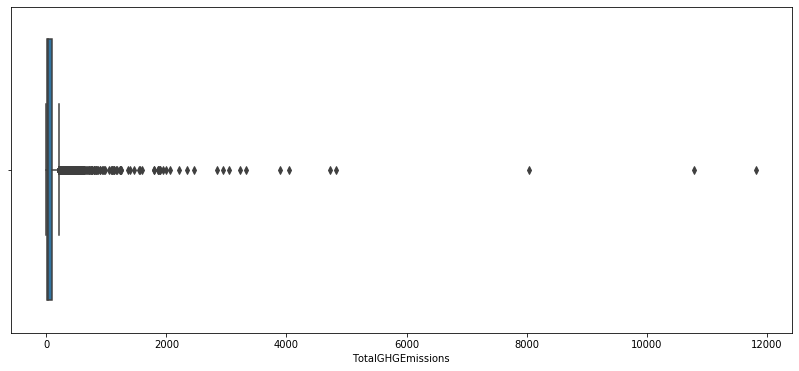

In [90]:
#Visualising distribution
sns.boxplot(df_2015['TotalGHGEmissions'])

In [91]:
#Three huge outliers stand out, let's see what they are
df_2015[df_2015['TotalGHGEmissions'] > 6000]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier
123,198,2015,NonResidential,Hospital,SEATTLE CHILDREN'S HOSPITAL (MAIN CAMPUS),2982800005,"{'latitude': '47.66356652', 'longitude': '-122...",4,NORTHEAST,1953,1,10.0,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,13.0,285.8,290.9,572.9,561.7,251191824.0,255669168.0,0.0,33629360.0,114748139.0,1364484.0,136448438.0,8046.70,8.59,No,NaN,Compliant,NaN
170,276,2015,NonResidential,Hospital,HARBORVIEW MEDICAL CENTER,8590900220,"{'latitude': '47.60387131', 'longitude': '-122...",3,EAST,2000,1,8.0,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,30.0,219.1,220.5,508.5,498.3,295812640.0,297740960.0,122701720.0,50083380.0,170891586.0,22264.0,2226424.0,10780.64,8.67,No,NaN,Compliant,NaN
621,828,2015,NonResidential,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,1978201096,"{'latitude': '47.608951', 'longitude': '-122.3...",3,EAST,1994,1,14.0,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,59.0,174.9,178.6,374.6,372.0,286685536.0,292746272.0,127869744.0,41161340.0,140448322.0,183733.0,18373320.0,11824.89,6.35,No,NaN,Compliant,NaN


<b>Conclusion</b>: Once again, our 3 biggest emitters are the hospitals, which is in line with what we saw earlier. Nothing to adjust here.

## Location Info

Through visualizing the data in Tableau, we can see that a number of buildings are labelled in the wrong neighbourhood. Let's fix these.

<img src="Tableau_Map1.png" width="400">

In [92]:
#Obtained from Tableau
wrong_neigh = ['21464_2015', '21465_2015', '23579_2015', '27039_2015', '27655_2015']

In [93]:
for i in wrong_neigh:
    ind = data[data['Key'] == i].index
    data.loc[ind,'Neighborhood'] = "MAGNOLIA / QUEEN ANNE"

In [94]:
#Correcting a point incorrectly labelled as East
ind = data[data['Key'] == '649_2016'].index
data.loc[ind,'Neighborhood'] = "GREATER DUWAMISH"

In [95]:
#Correcting a point incorrectly labelled as East
ind = data[data['Key'] == '29069_2016'].index
data.loc[ind,'Neighborhood'] = "SOUTHEAST"

In [96]:
#As all the data is located in Seattle, in the state of Washington, we can remove these two columns to avoid having redundant information in our model
data.drop(columns = ['City', 'State'], inplace = True)

#### Further Classification <br>

There are still a lot of categories, which are going to make one-hot encoding very difficult later on. We need to put some categorical variables into broader categories.

In [97]:
#Check how many unique values we have for the different categorical variables.

data[data.columns[data.dtypes==object]].nunique()

BuildingType                        8
PrimaryPropertyType                23
PropertyName                     6503
TaxParcelIdentificationNumber    3719
Neighborhood                       13
ListOfAllPropertyUseTypes         489
LargestPropertyUseType             57
SecondLargestPropertyUseType       50
ThirdLargestPropertyUseType        44
YearsENERGYSTARCertified          116
DefaultData                         4
Comments                            8
ComplianceStatus                    4
Outlier                             3
Address                          6355
ZipCode                            56
Key                              6686
dtype: int64

In [98]:
#Property Use Types are an issue here so we can group them up
property_use_types_col = ['PrimaryPropertyType',
                          'LargestPropertyUseType',
                          'SecondLargestPropertyUseType',
                          'ThirdLargestPropertyUseType'
                         ]

In [99]:
for i in property_use_types_col:
    print(i)
    print('\n')
    print(data[i].value_counts())

PrimaryPropertyType


Low-Rise Multifamily           1974
Mid-Rise Multifamily           1103
Small- and Mid-Sized Office     590
Other                           511
Non-Refrigerated Warehouse      374
Large Office                    343
K-12 School                     270
Mixed Use Property              258
High-Rise Multifamily           208
Retail Store                    190
Hotel                           150
Worship Facility                143
Distribution Center             106
Senior Care Community            88
Medical Office                   82
Supermarket/Grocery Store        76
Self-Storage Facility            56
College/University               47
Residence Hall/Dormitory         38
Refrigerated Warehouse           25
Restaurant                       23
Hospital                         20
Laboratory                       11
Name: PrimaryPropertyType, dtype: int64
LargestPropertyUseType


Multifamily Housing                                     3264
Office                  

In [100]:
#Create broader categories for property use types
# Based on following classification: https://en.wikipedia.org/wiki/List_of_building_types

use_type_dict = {
    #Residential
    'Low-Rise Multifamily' : 'Residential',
    'Mid-Rise Multifamily' : 'Residential',
    'High-Rise Multifamily': 'Residential',
    'Senior Care Community': 'Residential',
    'Residence Hall/Dormitory' : 'Residential',
    'Multifamily Housing' : 'Residential',
    'Other - Lodging/Residential' : 'Residential',
    'Prison/Incarceration' : 'Residential',
    'Residential Care Facility' : 'Residential',
    
    #Office
    'Small- and Mid-Sized Office': 'Office',
    'Large Office' : 'Office',
    'Office' : 'Office',
    'Bank Branch' : 'Office',
    'Financial Office' : 'Office',
    'Police Station' : 'Office',
    'Courthouse' : 'Office',
    'Fire Station' : 'Office',
    
    #Industrial
    'Non-Refrigerated Warehouse' : 'Industrial',
    'Distribution Center' : 'Industrial',
    'Self-Storage Facility' : 'Industrial',
    'Refrigerated Warehouse' : 'Industrial',
    'Manufacturing/Industrial Plant' : 'Industrial',
    'Data Center' : 'Industrial',
    
    #Educational
    'K-12 School' : 'Educational',
    'College/University' : 'Educational',
    'Other - Education' : 'Educational',
    'Adult Education' : 'Educational',
    'Pre-school/Daycare' : 'Educational',
    'Vocational School' : 'Educational',
    
    #Social - Only category not taken from Wiki page: Combination of retail, civic
    'Retail Store' : 'Social',
    'Supermarket/Grocery Store' : 'Social',
    'Restaurant' : 'Social',
    'Strip Mall' : 'Social',
    'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Social',
    'Automobile Dealership' : 'Social',
    'Other - Recreation' : 'Social',
    'Other - Entertainment/Public Assembly' : 'Social',
    'Social/Meeting Hall' : 'Social',
    'Museum' : 'Social',
    'Other - Services' : 'Social',  
    'Fitness Center/Health Club/Gym' : 'Social',
    'Library' : 'Social',
    'Other - Mall' : 'Social',
    'Performing Arts' : 'Social',
    'Lifestyle Center' : 'Social',
    'Wholesale Club/Supercenter' : 'Social',
    'Movie Theater' : 'Social',
    'Food Service' : 'Social',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)' : 'Social',
    'Other - Services' : 'Social',
    'Swimming Pool' : 'Social',
    'Bar/Nightclub' : 'Social',
    'Automobile Dealership' : 'Social',
    'Convenience Store without Gas Station' : 'Social',
    'Enclosed Mall' : 'Social',
    'Food Sales' : 'Social',
    
    #Religious
    'Worship Facility' : 'Religious',
    
    #Hotel
    'Hotel' : 'Hotel',
    
    #Health
    'Medical Office' : 'Health',
    'Hospital': 'Health',
    'Laboratory' : 'Health',
    'Hospital (General Medical & Surgical)' : 'Health',
    'Urgent Care/Clinic/Other Outpatient' : 'Health',
    'Other/Specialty Hospital' : 'Health', 
    'Outpatient Rehabilitation/Physical Therapy' : 'Health',
    
    #Other
    'Other' : 'Other',
    'Mixed Use Property' : 'Other',
    'Other - Public Services' : 'Other',
    'Other - Utility' : 'Other',
    'Other - Technology/Science' : 'Other',
    'Convention Center' : 'Other',
    
    #No Use
    'NA' : 'No Use'
}

In [101]:
for column in property_use_types_col:
    data[column] = data[column].replace(use_type_dict)

In [102]:
for i in property_use_types_col:
    print(i)
    print('\n')
    print(data[i].value_counts())

PrimaryPropertyType


Residential    3411
Office          933
Other           769
Industrial      561
Educational     317
Social          289
Hotel           150
Religious       143
Health          113
Name: PrimaryPropertyType, dtype: int64
LargestPropertyUseType


Residential    3409
Office          995
Industrial      597
Social          512
Educational     327
Other           214
Hotel           145
No Use          144
Health          142
Religious       141
Parking          60
Name: LargestPropertyUseType, dtype: int64
SecondLargestPropertyUseType


No Use         3453
Parking        1855
Social          572
Office          437
Industrial      123
Other           121
Health           43
Residential      43
Educational      25
Religious         7
Hotel             7
Name: SecondLargestPropertyUseType, dtype: int64
ThirdLargestPropertyUseType


No Use         5532
Social          514
Office          227
Parking         135
Other           105
Industrial       77
Health           40


## Final Cleaning for Model Use

### Removing unique identifiers and columns that are not useful

In [103]:
#Any column that contains information that is going to be unique to a particular row will not be useful in a machine learning model so we can remove them
data.drop(columns = ['OSEBuildingID', #Unique ID
                      'PropertyName', #Unique value
                      'TaxParcelIdentificationNumber', #Almost unique value
                      'YearsENERGYSTARCertified', #No added value
                      'DefaultData', #Not clear what the value of this is
                      'Comments', #No value in this exercise
                      'Address', #Unique value
                      'Key', #Unique value
                      'ListOfAllPropertyUseTypes', #Repetition of other columns
                     'ComplianceStatus', #Not relevant to describe building features
                     'ZipCode' #This has too many categories as a discrete variable, Longitude and Latitude are better continuous values to use
                     ], inplace = True)

In [104]:
#Remove information linked to the target variables

data.drop(columns = ['SourceEUI(kBtu/sf)', 
                       'SourceEUIWN(kBtu/sf)',
                       'SiteEUI(kBtu/sf)',
                       'SiteEUIWN(kBtu/sf)', 
                       'SiteEnergyUseWN(kBtu)', 
                       'SteamUse(kBtu)', 
                       'Electricity(kWh)', 
                       'Electricity(kBtu)',
                       'NaturalGas(therms)',
                       'NaturalGas(kBtu)',
                       'GHGEmissionsIntensity'
                      ], inplace = True)

### Energy Star Score

One of the goals of the assignment is to check the value of the Energy Star Score variable. In order to do this, we will make datasets with the Energy Star Score and datasets without it and test the performance of the models based on this.<br>

I am choosing to make a separate dataset because the Energy Star Score has quite a lot of missing values and will therefore give us fewer measurements with which to train our model.

In [105]:
#Make energy score dataset and drop all records with no Energy Score information
data_en = data.dropna(subset = ['ENERGYSTARScore'])

#Remove Energy Star Score 
data.drop(columns = ["ENERGYSTARScore"], inplace = True)

In [106]:
data_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5090 entries, 0 to 6711
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         5090 non-null   int64  
 1   BuildingType                     5090 non-null   object 
 2   PrimaryPropertyType              5090 non-null   object 
 3   CouncilDistrictCode              5090 non-null   int64  
 4   Neighborhood                     5090 non-null   object 
 5   YearBuilt                        5090 non-null   int64  
 6   NumberofBuildings                5090 non-null   float64
 7   NumberofFloors                   5090 non-null   float64
 8   PropertyGFATotal                 5090 non-null   int64  
 9   PropertyGFAParking               5090 non-null   float64
 10  PropertyGFABuilding(s)           5090 non-null   int64  
 11  LargestPropertyUseType           5090 non-null   object 
 12  LargestPropertyUseTy

In [107]:
data_final = data.drop(data[data['SiteEnergyUse(kBtu)'] == 0].index)
data_final = data_final.drop(data_final[data_final['TotalGHGEmissions'] == 0].index)
data_final_en = data_en.drop(data_en[data_en['SiteEnergyUse(kBtu)'] == 0].index)
data_final_en = data_final_en.drop(data_final_en[data_final_en['TotalGHGEmissions'] == 0].index)

In [108]:
#Output cleaned data to new CSV file
data_final.to_csv('data_final_20200411.csv')
print(f"data_final.csv file generated with {len(data_final)} rows")

data_final_en.to_csv('data_final_en_20200411.csv')
print(f"data_final_en.csv file generated with {len(data_final_en)} rows")

data_final.csv file generated with 6673 rows
data_final_en.csv file generated with 5088 rows


## Exploration

Evaluating the correlation between different features and between the two target variables

In [109]:
#Select Numerical columns
numerical_cols = data_final.select_dtypes(exclude='object').columns

In [112]:
#Correlation table
corr = data[numerical_cols].corr()

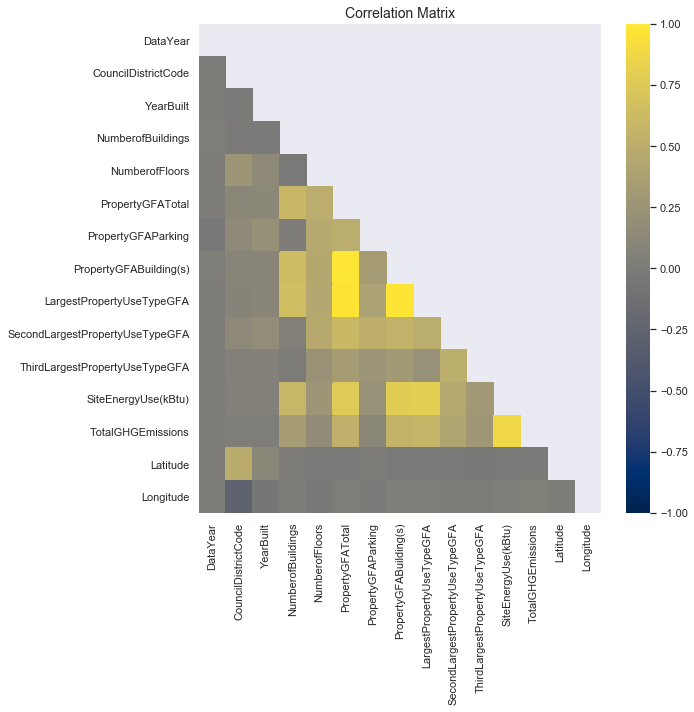

In [133]:
#Plot correlation matrix
plt.figure(figsize=(9,9))
sns.set(font_scale=1)
plt.title('Correlation Matrix', fontsize = 14)

mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = "cividis", annot = False, mask = mask)

Pearson Coefficient: 0.87


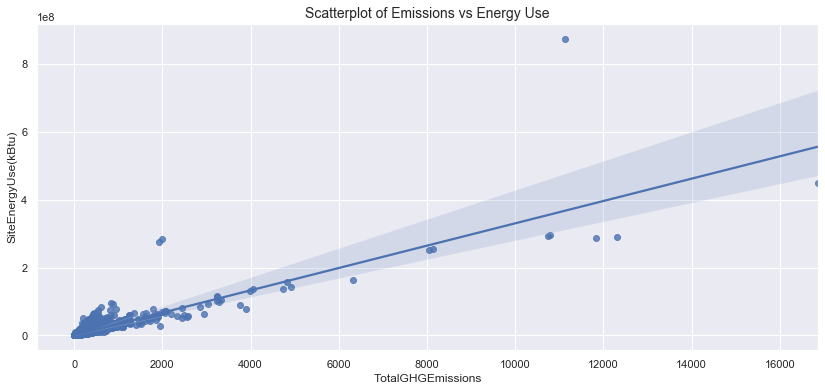

In [145]:
#Plot scatterplot with Pearson Coefficient
from scipy.stats import pearsonr

print(f"Pearson Coefficient: {round(pearsonr(data_final['TotalGHGEmissions'], data_final['SiteEnergyUse(kBtu)'])[0],2)}")
sns.regplot(data_final['TotalGHGEmissions'], data_final['SiteEnergyUse(kBtu)'])
plt.title("Scatterplot of Emissions vs Energy Use", fontsize = 14)
plt.show()

The rest of the exploratory graphs shown in the presentation were done in a Tableau workbook to benefit from mapping functionalities and to try out different tools